In [5]:
import pandas as pd

# Define correct column names
column_names = ["Date", "Open", "High", "Low", "Close", "Volume"]

# Load CSV, skipping first two rows, and setting column names
df = pd.read_csv("../data/bitcoin_prices.csv", skiprows=2, names=column_names)

# Convert "Date" to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop any rows where "Date" is missing (just in case)
df = df.dropna(subset=["Date"])

# Set "Date" as the index
df.set_index("Date", inplace=True)

# Display dataset info
df.info()

# Show first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1502 entries, 2020-01-01 to 2024-02-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1502 non-null   float64
 1   High    1502 non-null   float64
 2   Low     1502 non-null   float64
 3   Close   1502 non-null   float64
 4   Volume  1502 non-null   float64
dtypes: float64(5)
memory usage: 70.4 KB


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,1.856566e+10
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,2.080208e+10
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,2.811148e+10
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,1.844427e+10
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,1.972507e+10


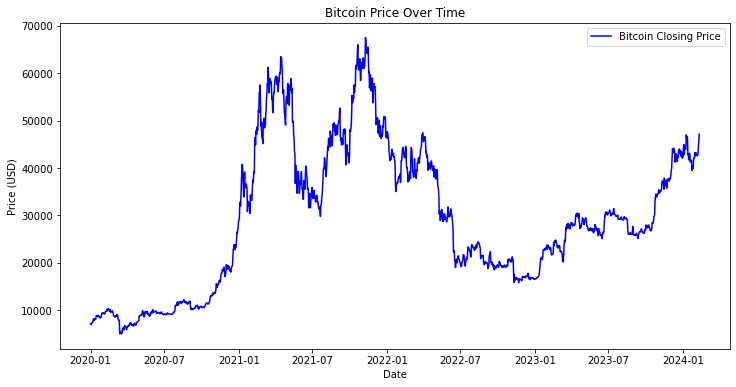

In [6]:
import matplotlib.pyplot as plt

# Plot Bitcoin Closing Price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Bitcoin Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.show()


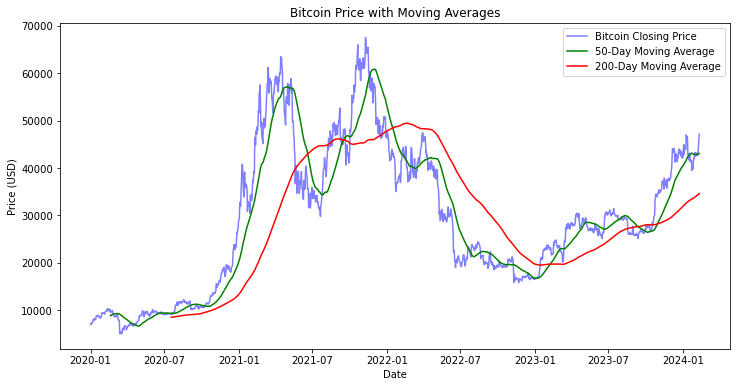

In [7]:
# Calculate 50-day and 200-day moving averages
df["50_MA"] = df["Close"].rolling(window=50).mean()
df["200_MA"] = df["Close"].rolling(window=200).mean()

# Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Bitcoin Closing Price", color="blue", alpha=0.5)
plt.plot(df.index, df["50_MA"], label="50-Day Moving Average", color="green")
plt.plot(df.index, df["200_MA"], label="200-Day Moving Average", color="red")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price with Moving Averages")
plt.legend()
plt.show()


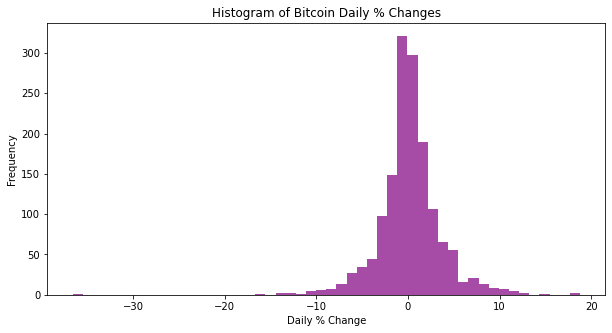

In [8]:
# Calculate daily % change
df["Daily Change %"] = df["Close"].pct_change() * 100

# Plot histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(df["Daily Change %"].dropna(), bins=50, alpha=0.7, color="purple")
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.title("Histogram of Bitcoin Daily % Changes")
plt.show()
